In [209]:
!pip install yfinance

In [210]:
import yfinance as yf
data = yf.download('TATAMOTORS.NS', period = '5y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [211]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [212]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,276.000000,276.049988,265.600006,266.700012,266.700012,16495647
2018-07-03,269.500000,271.500000,267.200012,269.450012,269.450012,11484332
2018-07-04,270.000000,271.500000,265.649994,267.049988,267.049988,7394858
2018-07-05,263.500000,263.750000,252.550003,261.549988,261.549988,20820454
2018-07-06,262.000000,272.500000,261.850006,270.850006,270.850006,19215897
...,...,...,...,...,...,...
2023-06-22,584.000000,584.700012,568.200012,569.349976,569.349976,11229179
2023-06-23,570.000000,571.150024,557.700012,559.650024,559.650024,9362695
2023-06-26,560.000000,569.000000,557.799988,567.849976,567.849976,6986621


<Axes: xlabel='Date', ylabel='Close'>

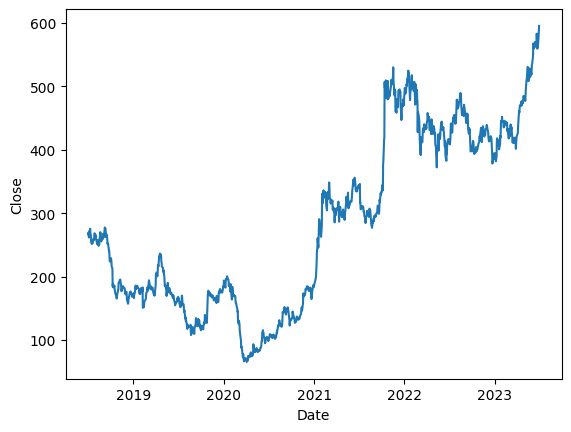

In [213]:
sns.lineplot(data = data , x=  data.index, y= data['Close'])

In [214]:
data_model = data.loc[:, 'Adj Close']

In [215]:
data_model = pd.DataFrame(data_model)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_model['Adj Close'].to_numpy().reshape(-1, 1))

data_model['Adj Close'] = scaled_data


data_model


,Adj Close
Date,
2018-07-02,0.379821
2018-07-03,0.385007
2018-07-04,0.380481
2018-07-05,0.370108
2018-07-06,0.387647
...,...
2023-06-22,0.950589
2023-06-23,0.932296
2023-06-26,0.947760


<Axes: xlabel='Date', ylabel='Adj Close'>

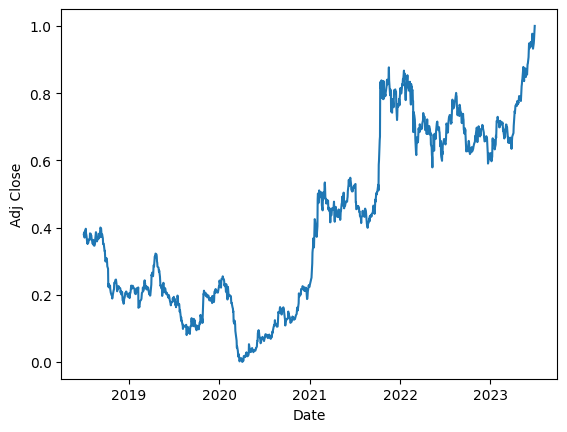

In [216]:
sns.lineplot(data = data_model , x=  data_model.index, y= data_model['Adj Close'])

In [217]:
data_train = data_model[: 1000]
data_test = data_model[1001 : len(data_model) ]
data_train

,Adj Close
Date,
2018-07-02,0.379821
2018-07-03,0.385007
2018-07-04,0.380481
2018-07-05,0.370108
2018-07-06,0.387647
...,...
2022-07-13,0.682320
2022-07-14,0.684111
2022-07-15,0.707025


In [218]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, 1000):
    X_train.append(data_train['Adj Close'][i-time_step:i])
    y_train.append(data_train['Adj Close'][i])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [219]:
X_train.shape

(950, 50)

In [220]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
30/30 [==============================] - 6s 53ms/step - loss: 0.3855 - accuracy: 0.0011
Epoch 2/50
30/30 [==============================] - 3s 104ms/step - loss: 0.2503 - accuracy: 0.0011
Epoch 3/50
30/30 [==============================] - 4s 130ms/step - loss: 0.2102 - accuracy: 0.0011
Epoch 4/50
30/30 [==============================] - 4s 136ms/step - loss: 0.1379 - accuracy: 0.0011
Epoch 5/50
30/30 [==============================] - 3s 94ms/step - loss: 0.1273 - accuracy: 0.0011
Epoch 6/50
30/30 [==============================] - 3s 113ms/step - loss: 0.0908 - accuracy: 0.0011
Epoch 7/50
30/30 [==============================] - 4s 127ms/step - loss: 0.0793 - accuracy: 0.0011
Epoch 8/50
30/30 [==============================] - 4s 117ms/step - loss: 0.0554 - accuracy: 0.0011
Epoch 9/50
30/30 [==============================] - 2s 71ms/step - loss: 0.0514 - accuracy: 0.0011
Epoch 10/50
30/30 [==============================] - 1s 48ms/step - loss: 0.0429 - accuracy: 0.0011
Epo

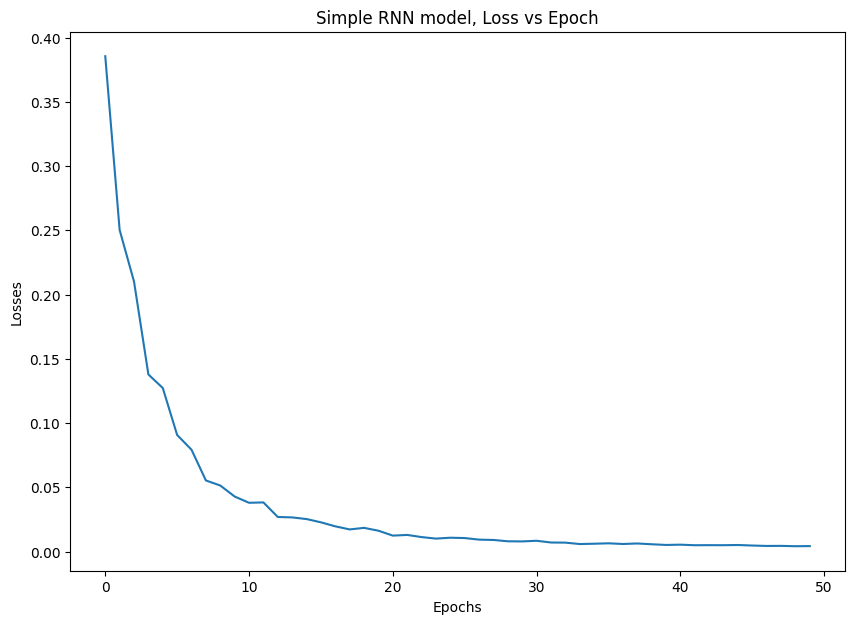

In [221]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [222]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original

30/30 [==============================] - 1s 13ms/step


In [223]:
y_train = scaler.inverse_transform(y_train.reshape(-1,1)) # scaling back from 0-1 to original
y_train.shape

(950, 1)

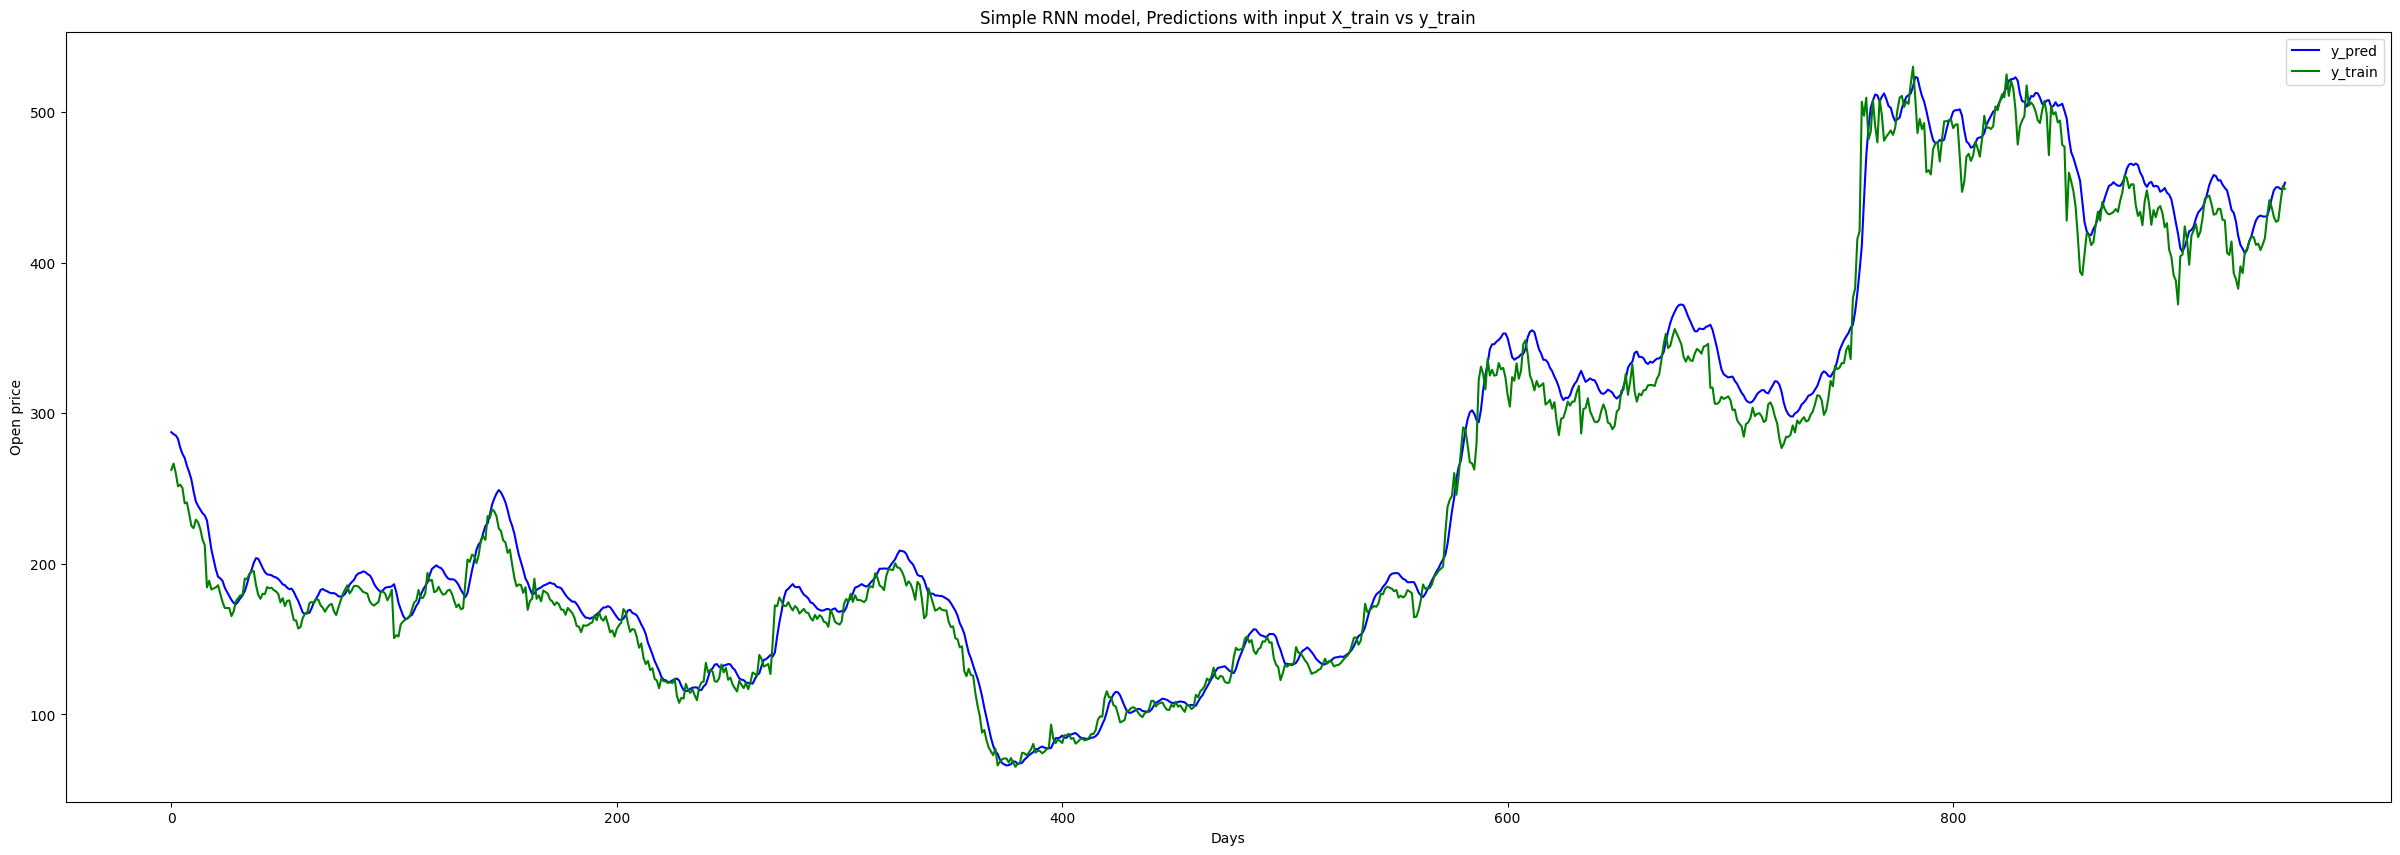

In [224]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [225]:
scaled_data_test = scaler.fit_transform(data_test['Adj Close'].to_numpy().reshape(-1,1))


In [226]:
len(data_model)

1233

In [227]:
X_test = []
y_test = []

for i in range(time_step, 232):
  if i is None:
    i = 0.5
  X_test.append(data_train['Adj Close'][i-time_step:i])
  y_test.append(data_train['Adj Close'][i])

In [228]:
len(y_test)

182

In [229]:
X_train.shape

(950, 50)

In [230]:
X_test, y_test = np.array((X_test)), np.array(y_test)

In [231]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [232]:
X_test = np.float32(X_test)

In [233]:
# test_data = pd.DataFrame(X_test.reshape(-1,1))

In [234]:
X_test.shape

(182, 50)

In [235]:
# regressor.add(input_shape = )
y_pred_of_test = regressor.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)

6/6 [==============================] - 0s 12ms/step


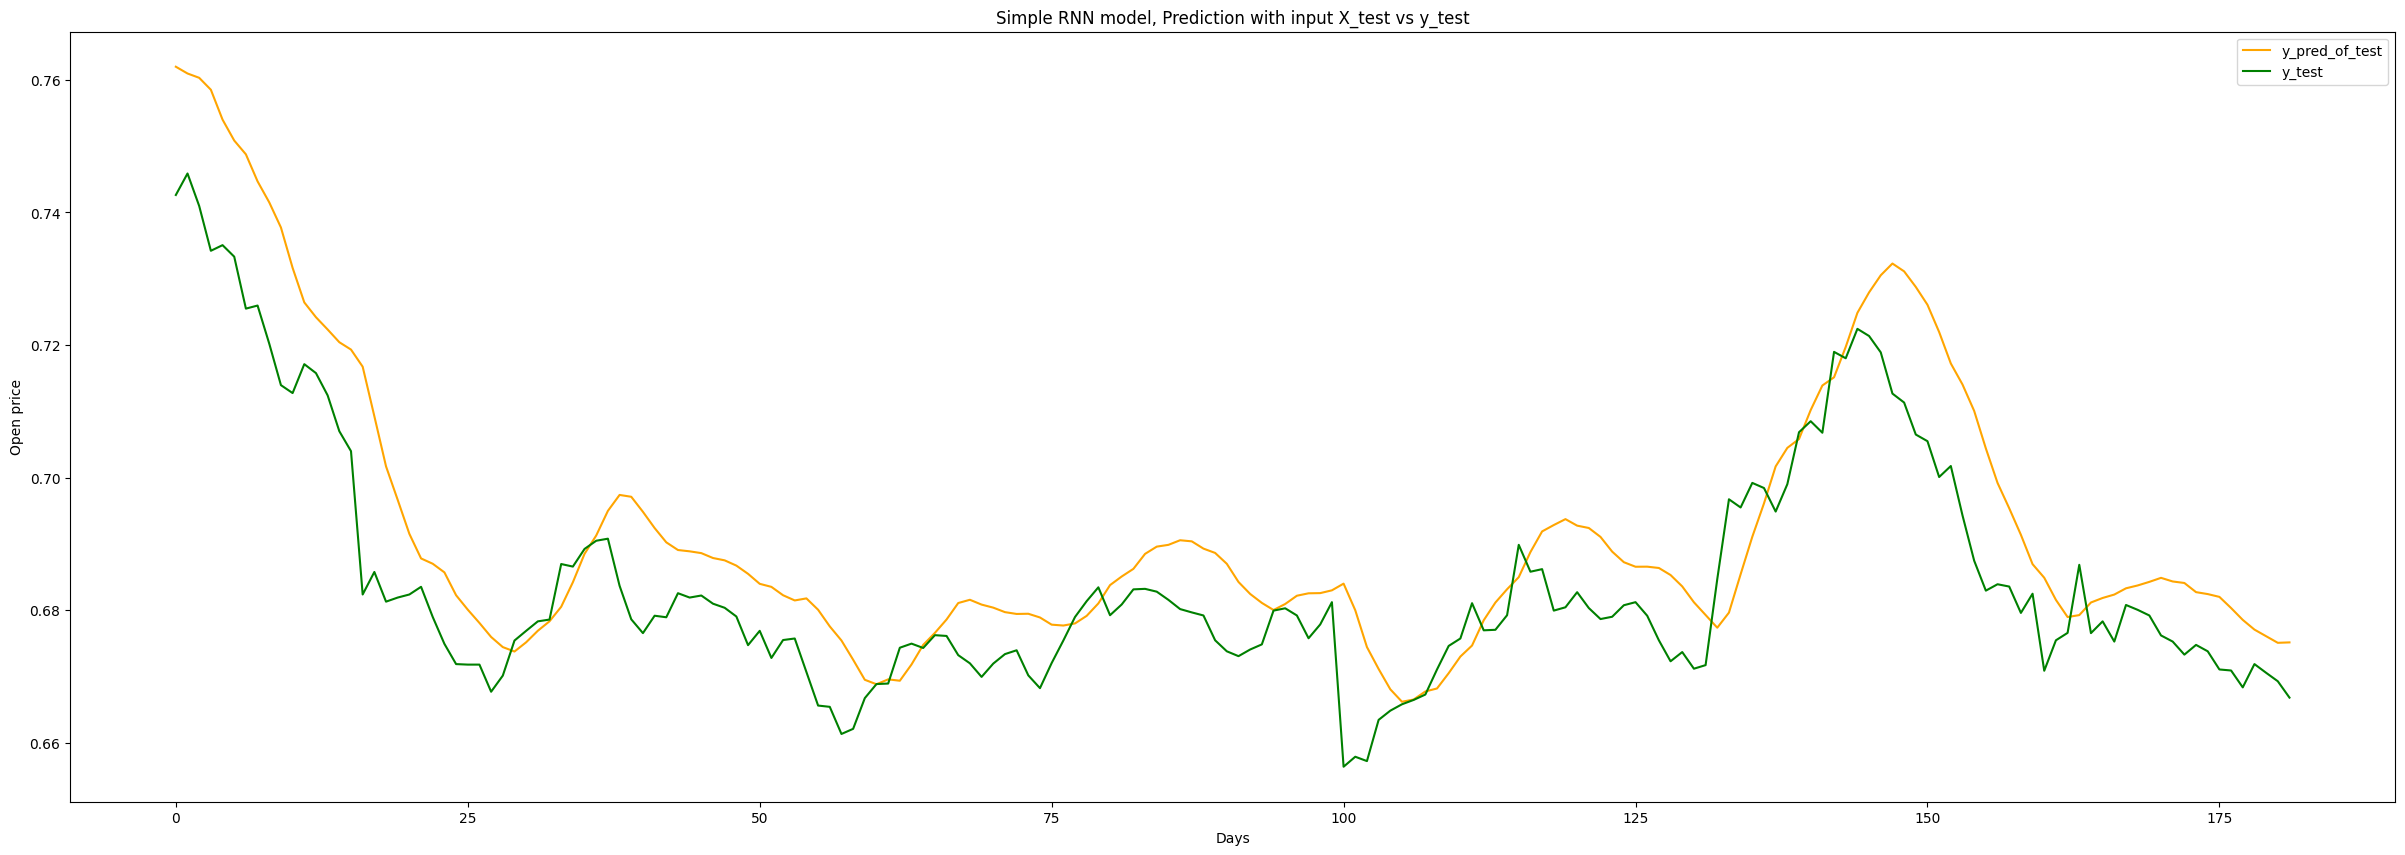

In [236]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

In [243]:
y_train = scaler.fit_transform(y_train)

In [244]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 50, batch_size = 30)

Epoch 1/50
32/32 [==============================] - 6s 51ms/step - loss: 0.0166 - accuracy: 0.0021
Epoch 2/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0022 - accuracy: 0.0021
Epoch 3/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0018 - accuracy: 0.0021
Epoch 4/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0016 - accuracy: 0.0021
Epoch 5/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0014 - accuracy: 0.0021
Epoch 6/50
32/32 [==============================] - 3s 81ms/step - loss: 0.0013 - accuracy: 0.0021
Epoch 7/50
32/32 [==============================] - 2s 59ms/step - loss: 0.0013 - accuracy: 0.0021
Epoch 8/50
32/32 [==============================] - 2s 51ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 9/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0011 - accuracy: 0.0021
Epoch 10/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0014 - accuracy: 0.0021
Epoch 11/

6/6 [==============================] - 2s 23ms/step


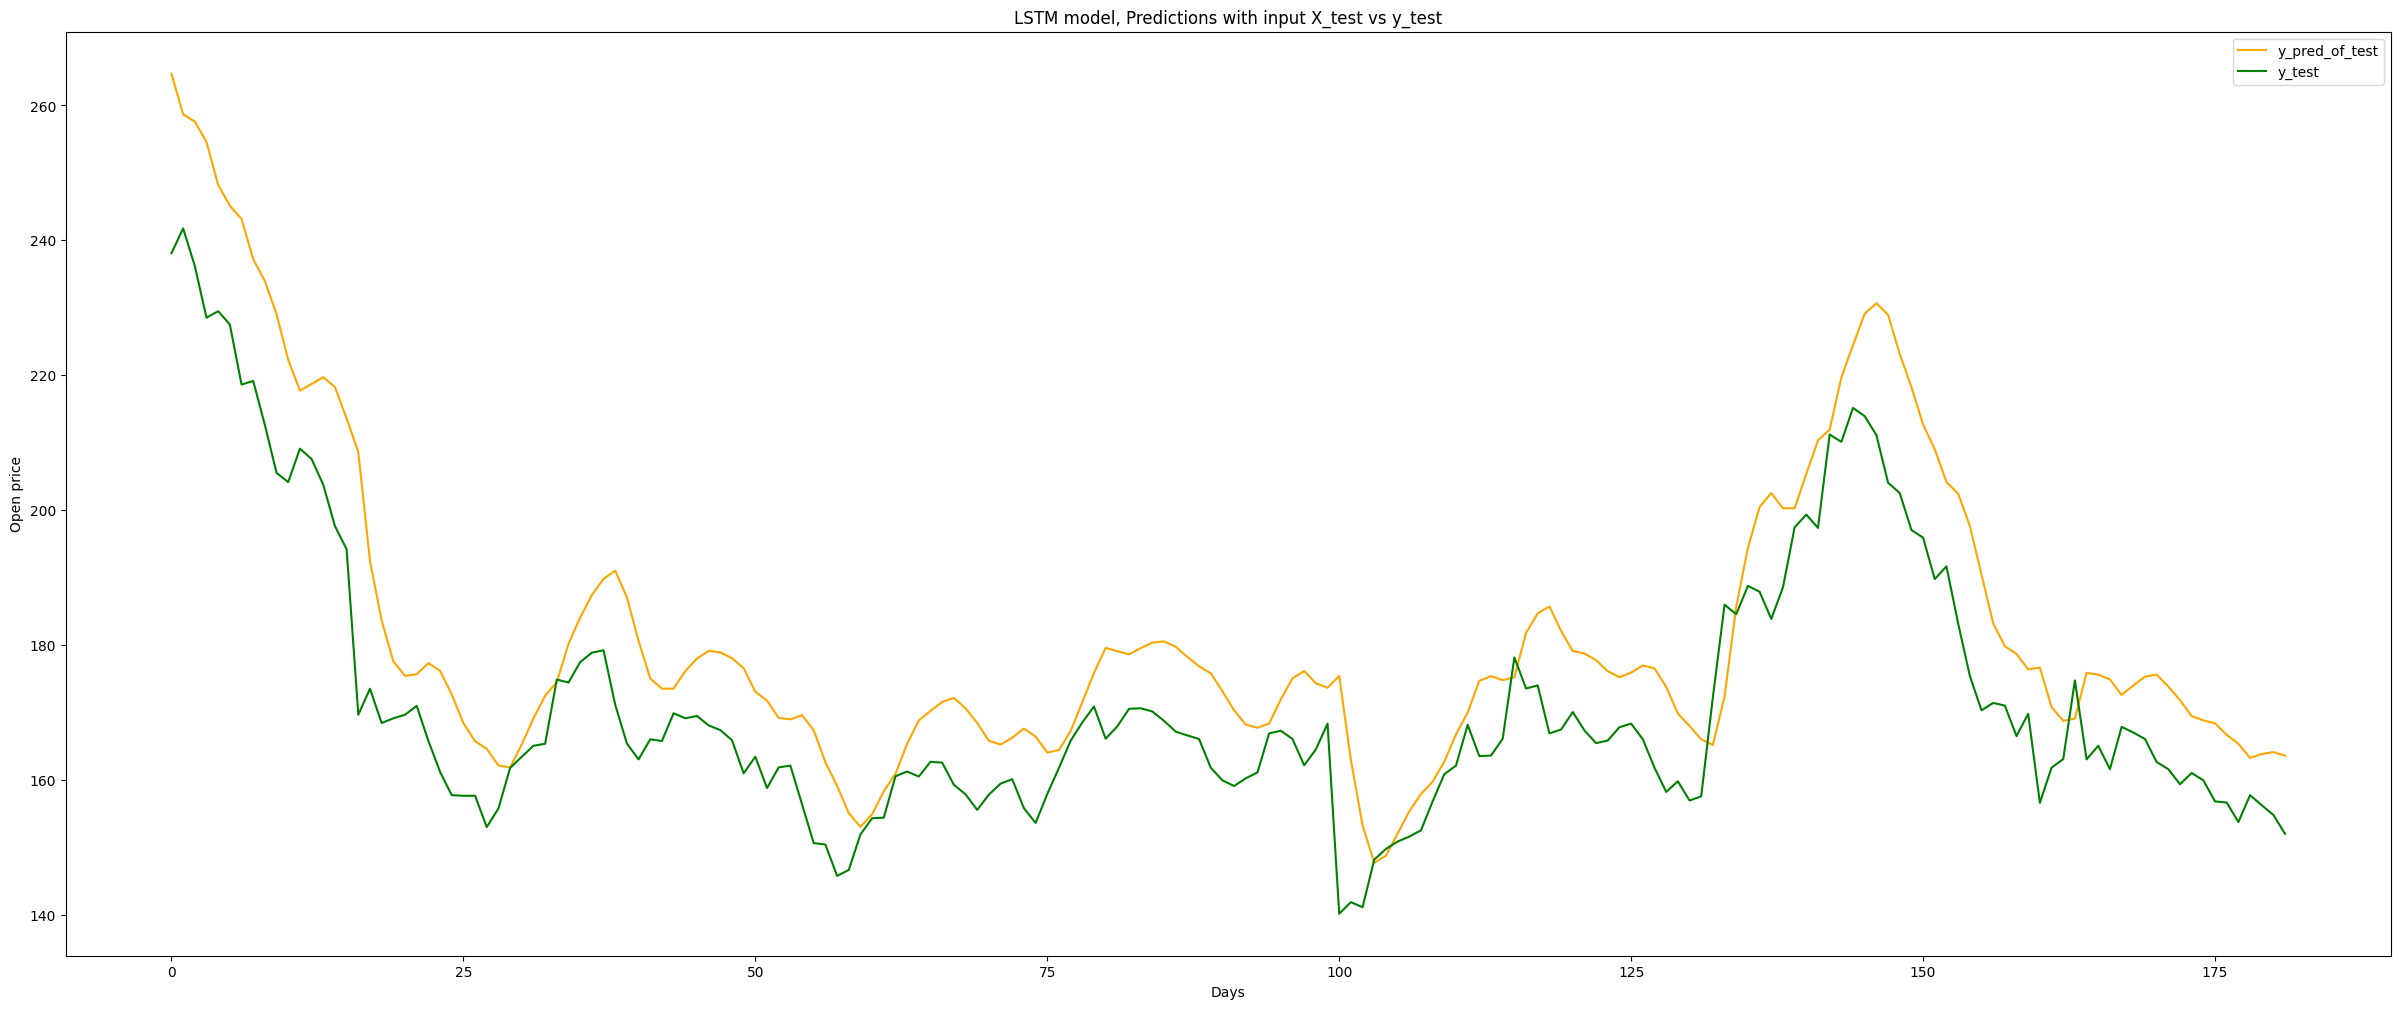

In [245]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [246]:
data_model.iloc[-1]

Adj Close    1.0
Name: 2023-06-30 00:00:00, dtype: float64

In [247]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50))                    # reshaping : converting to 3D array

In [248]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 1/07/2023      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 1/07/2023 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 24ms/step
Simple RNN, Open price prediction for 1/07/2023      : 574.66693
LSTM prediction, Open price prediction for 1/07/2023 : 595.84924
